# Title of Project: 


# Big Sales Data

# Objective: Predicting Item Outlet Sales based on various features.

# Data Source: The data used in this project is sourced from the 'Big Sales Data.csv' dataset. 

# Import Libraries

In [1]:
# Data Science and Machine Learning Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics and Preprocessing
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

# Supervised Learning Algorithms
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Statistical Analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Utilities
import pickle
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

# Set Plot Style
sns.set()


## Import Data:

In [2]:
# Set a seed for reproducibility
np.random.seed(42)

In [3]:
df = pd.read_csv('Big Sales Data.csv')

## Describe Data:

In [4]:
# Fetch Categorical Data
cat_col = [col for col in df.columns if df[col].dtype == 'O']
categorical = df[cat_col]

In [5]:
# Data Preprocessing for Categorical Data
categorical.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)

In [6]:
# Impute missing values in categorical data
categorical["Outlet_Size"] = categorical["Outlet_Size"].fillna(categorical["Outlet_Size"].mode()[0])

In [7]:
# Encode Categorical Data
encoder = LabelEncoder()
for col in ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']:
    categorical[col] = encoder.fit_transform(categorical[col])

In [8]:
# Data Preprocessing for Numerical Data
Num_col = [col for col in df.columns if df[col].dtype != "O"]
Numerical = df[Num_col]
Numerical["Item_Weight"] = Numerical["Item_Weight"].fillna(Numerical["Item_Weight"].mean())

In [9]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDT36,12.3,Low Fat,0.111448,Baking Goods,33.4874,OUT049,1999,Medium,Tier 1,Supermarket Type1,436.608721
1,FDT36,12.3,Low Fat,0.111904,Baking Goods,33.9874,OUT017,2007,Medium,Tier 2,Supermarket Type1,443.127721
2,FDT36,12.3,LF,0.111728,Baking Goods,33.9874,OUT018,2009,Medium,Tier 3,Supermarket Type2,564.598400
3,FDT36,12.3,Low Fat,0.000000,Baking Goods,34.3874,OUT019,1985,Small,Tier 1,Grocery Store,1719.370000
4,FDP12,9.8,Regular,0.045523,Baking Goods,35.0874,OUT017,2007,Medium,Tier 2,Supermarket Type1,352.874000


In [10]:
print("The shape of the dataframe is: {:,} columns and {:,} rows".format(df.shape[1], df.shape[0]))

The shape of the dataframe is: 12 columns and 14,204 rows


In [11]:
df.dtypes.value_counts()

object     7
float64    4
int64      1
Name: count, dtype: int64

In [12]:
# Assuming your dataframe is named df
df.dropna(inplace=True)
print(df.shape)  # Check the shape after removing NULL values

(11815, 12)


In [13]:
# Checking NULL
null_count = sum(df.isnull().any())

print("There are {} NULL values in the dataframe".format(null_count))

There are 0 NULL values in the dataframe


In [14]:
# Check basic statistics, although difficult to go into detail with so many columns
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,11815,11815.000000,11815,11815.000000,11815,11815.000000,11815,11815.000000,11815,11815,11815,11815.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDT36,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT013,NaN,Medium,Tier 2,Supermarket Type1,NaN
freq,10,NaN,7071,NaN,1667,NaN,1553,NaN,5599,4641,9294,NaN
mean,NaN,12.788355,NaN,0.063624,NaN,140.656171,NaN,2000.425053,NaN,NaN,NaN,2041.744225
std,NaN,4.654126,NaN,0.048555,NaN,62.264762,NaN,6.650972,NaN,NaN,NaN,1402.636001
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.710000,NaN,0.026648,NaN,93.463300,NaN,1997.000000,NaN,NaN,NaN,957.108936
50%,NaN,12.500000,NaN,0.052312,NaN,141.915400,NaN,2002.000000,NaN,NaN,NaN,1737.738000
75%,NaN,16.750000,NaN,0.091493,NaN,185.760800,NaN,2007.000000,NaN,NaN,NaN,2842.676161


In [15]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11815 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            11815 non-null  object 
 1   Item_Weight                11815 non-null  float64
 2   Item_Fat_Content           11815 non-null  object 
 3   Item_Visibility            11815 non-null  float64
 4   Item_Type                  11815 non-null  object 
 5   Item_MRP                   11815 non-null  float64
 6   Outlet_Identifier          11815 non-null  object 
 7   Outlet_Establishment_Year  11815 non-null  int64  
 8   Outlet_Size                11815 non-null  object 
 9   Outlet_Location_Type       11815 non-null  object 
 10  Outlet_Type                11815 non-null  object 
 11  Item_Outlet_Sales          11815 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.2+ MB


## Data Visualization:

 ### Advanced Visualization of Categorical Data Using Python's Seaborn Library  

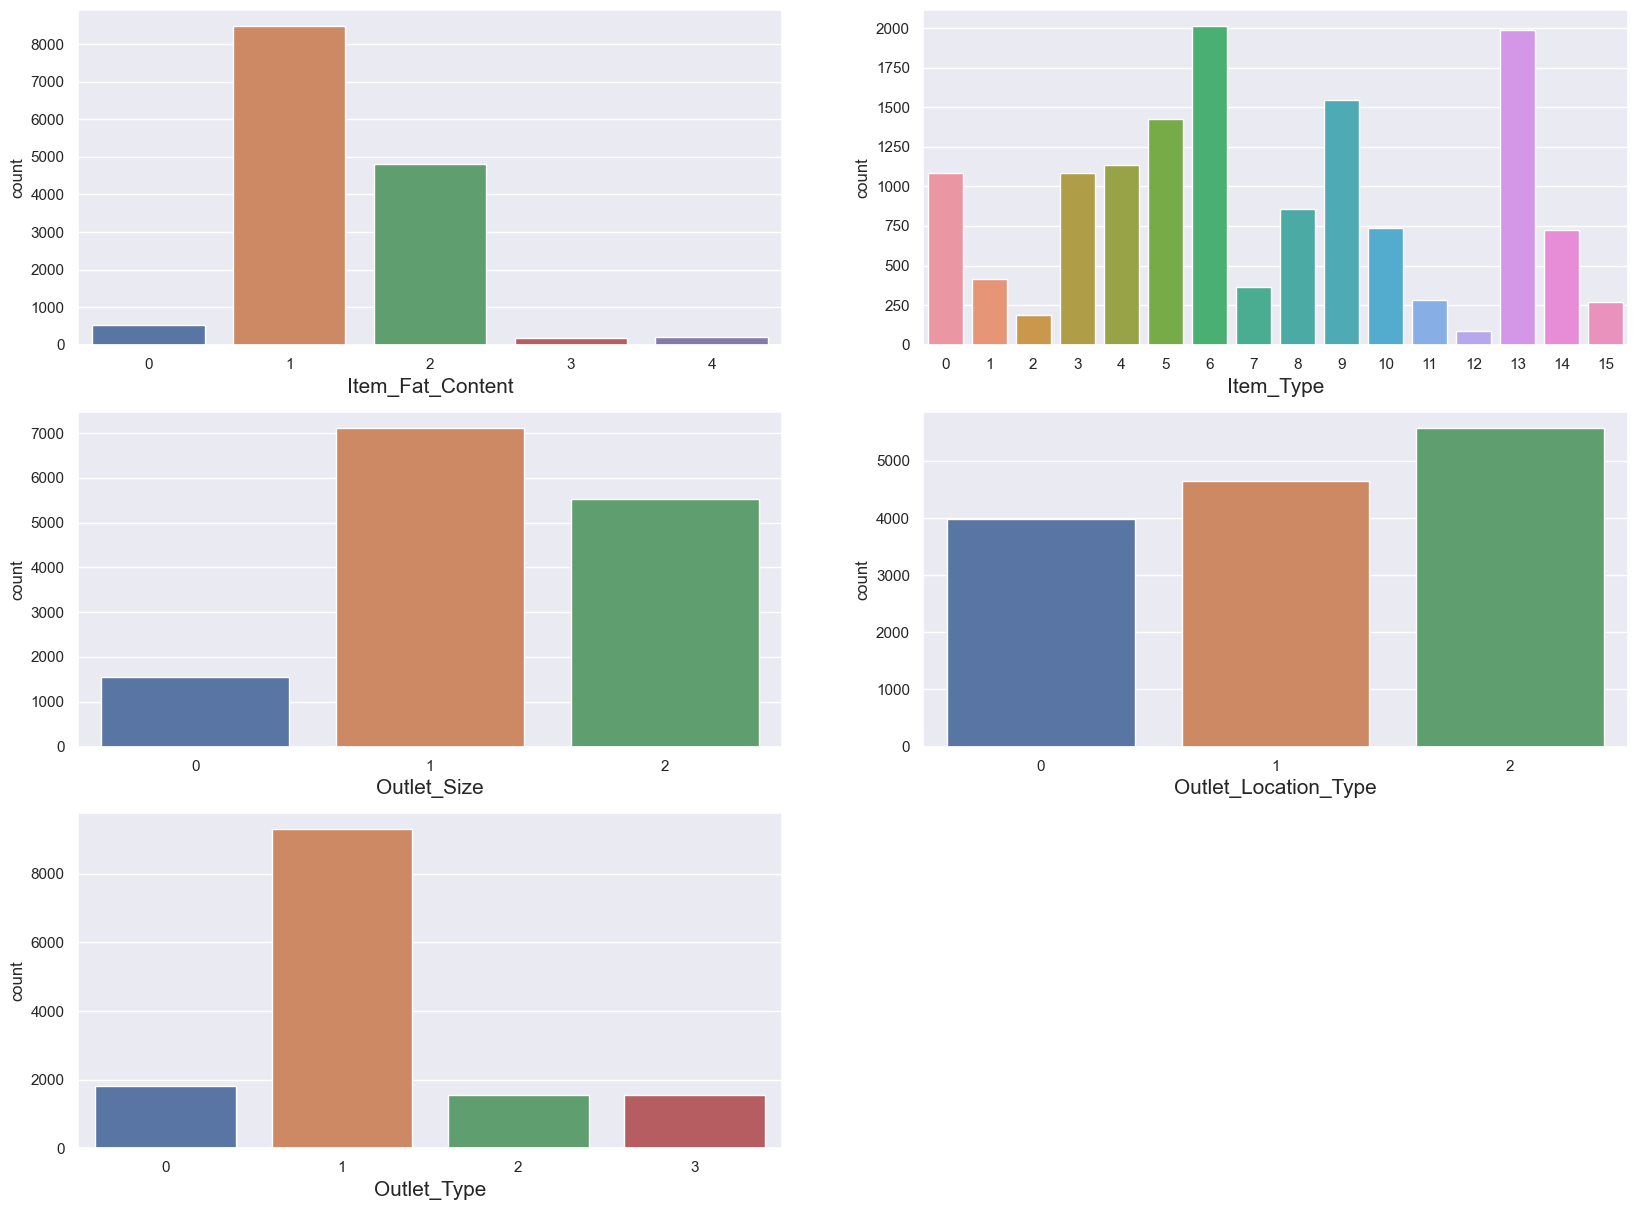

In [17]:
# Visualize Categorical Data
plt.figure(figsize=(20, 20))
plotnumber = 1
for column in categorical:
    if plotnumber <= 8:
        ax = plt.subplot(4, 2, plotnumber)
        sns.countplot(x=categorical[column], data=categorical)
        plt.xlabel(column, fontsize=15)
        plotnumber += 1
plt.show()

 ### Advanced Visualization of Numerical Data Using Python's Seaborn Library  

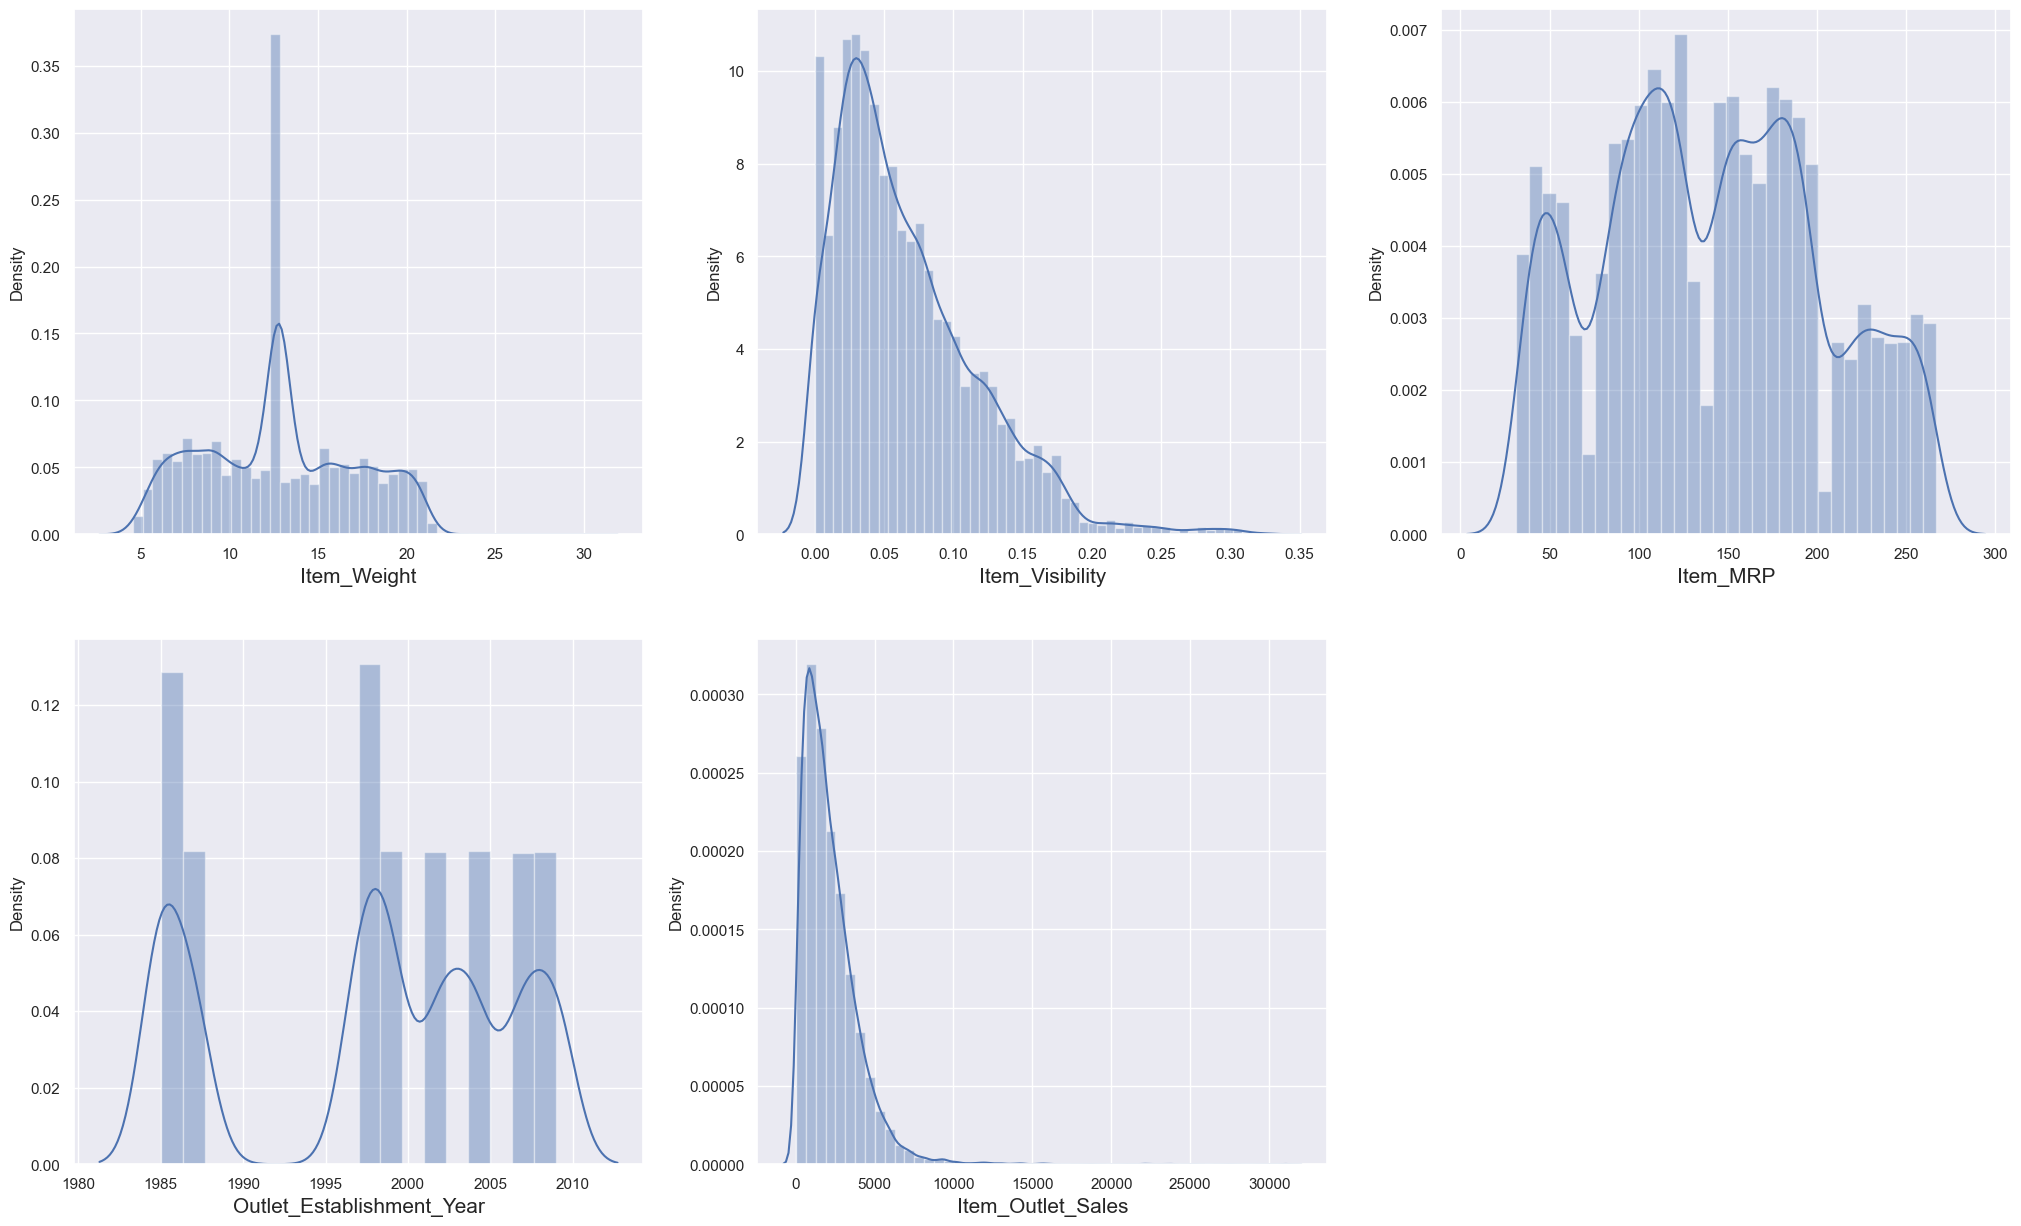

In [18]:
# Visualize Numerical Data
plt.figure(figsize=(25, 15))
plotnumber = 1
for column in Numerical:
    if plotnumber <= 7:
        ax = plt.subplot(2, 3, plotnumber)
        sns.distplot(Numerical[column])
        plt.xlabel(column, fontsize=15)
        plotnumber += 1
plt.show()

 ###  Integrated Data Visualization and Advanced Correlation Analysis of Categorical and Numerical Data Using Python's Seaborn Library  

<Axes: >

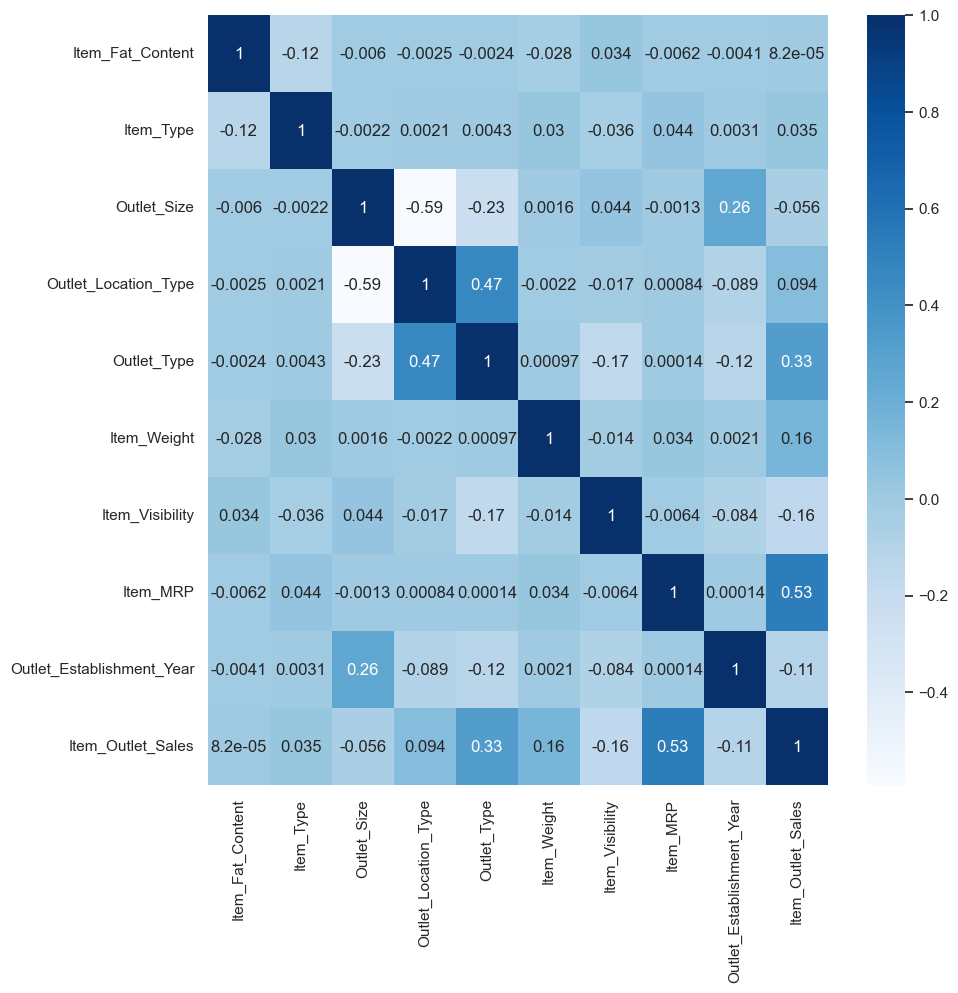

In [19]:
# Combine Categorical and Numerical Data
data = pd.concat([categorical, Numerical], axis=1)

# Explore Correlation using Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), cmap='Blues', annot=True)

 ### Comprehensive Pairwise Relationship Visualization of the Dataset Using Seaborn's Pairplot Function   

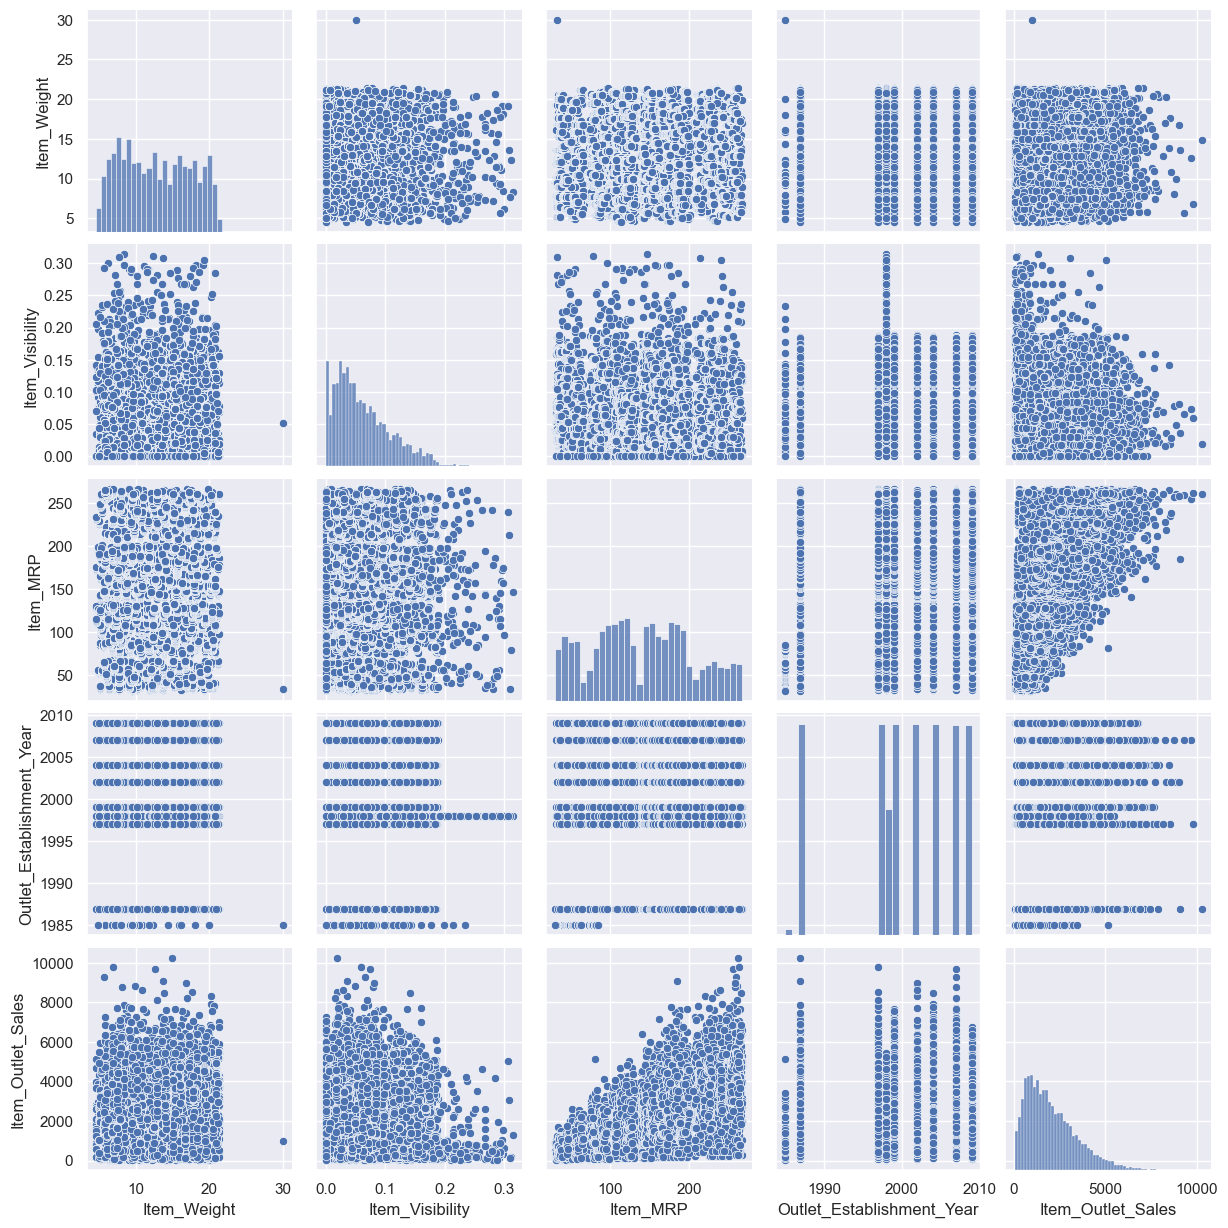

In [20]:
sns.pairplot(df)

## Data Preprocessing:

In [21]:
# Prepare Data for Modeling
X = data.drop(columns=["Item_Outlet_Sales"], axis=1)
y = data["Item_Outlet_Sales"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
# Check for Multicollinearity using VIF
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

## Define Target Variable (y) and Feature Variables (X):

In [23]:
X = data.drop(columns=["Item_Outlet_Sales"], axis=1)
y = data["Item_Outlet_Sales"]

## Train Test Split:

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=10)

# Modeling

In [25]:
def predict(ml_model, X_train, y_train, X_test_input):
    model = ml_model.fit(X_train, y_train)
    print('Training Accuracy Score: {}'.format(model.score(X_train, y_train)))
    y_prediction = model.predict(X_test_input)
    print('Predictions are:\n{}'.format(y_prediction))
    return y_prediction

# Call the functions with the respective models and X_test data
y_prediction_lr = predict(LinearRegression(), X_train, y_train, X_test)
y_prediction_rf = predict(RandomForestRegressor(), X_train, y_train, X_test)


Training Accuracy Score: 0.42965281389865484
Predictions are:
[4097.42025703 3475.93760472 3924.95289488 ... 2040.52406517 2150.24025382
  615.08952018]
Training Accuracy Score: 0.9285099241610043
Predictions are:
[4216.80806792 2695.78682624 4816.57858491 ... 1593.8955655  1609.49970797
  616.89828815]


## Model Evaluation:


Evaluation Metrics for Linear Regression:
R2 Score: 0.440659188489815
MAE: 870.9328262571865
MSE: 1683033.492880123
RMSE: 1297.317807200735

Evaluation Metrics for Random Forest Regressor:
R2 Score: 0.46266198930228564
MAE: 826.1605402226853
MSE: 1616827.9703390882
RMSE: 1271.545504627769


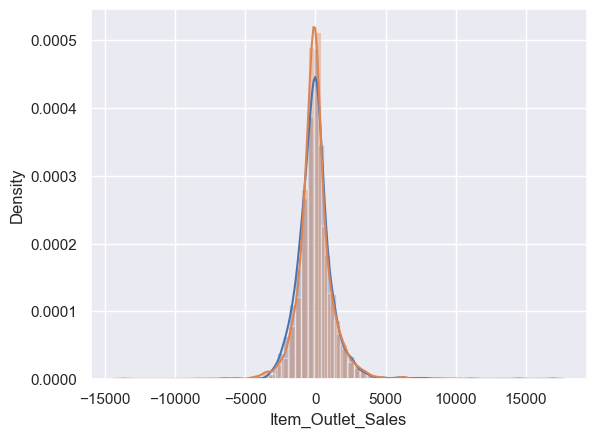

In [26]:
def evaluate_model(y_test, y_prediction):
    print('R2 Score: {}'.format(r2_score(y_test, y_prediction)))
    print('MAE:', mean_absolute_error(y_test, y_prediction))
    print('MSE:', mean_squared_error(y_test, y_prediction))
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_prediction)))
    sns.distplot(y_test - y_prediction)
    
# Evaluate the model predictions
print("\nEvaluation Metrics for Linear Regression:")
evaluate_model(y_test, y_prediction_lr)

print("\nEvaluation Metrics for Random Forest Regressor:")
evaluate_model(y_test, y_prediction_rf)


## Prediction:

In [27]:
# Cross-validation score
cv_scores_lr = cross_val_score(LinearRegression(), X_train, y_train, cv=5)
cv_scores_rf = cross_val_score(RandomForestRegressor(), X_train, y_train, cv=5)

print("\nCross-Validation Scores (Linear Regression):", cv_scores_lr)
print("Cross-Validation Scores (Random Forest):", cv_scores_rf)

# Additional Metrics
print("\nAdditional Metrics:")
print("R2 Score (Linear Regression):", r2_score(y_test, y_prediction_lr))
print("R2 Score (Random Forest):", r2_score(y_test, y_prediction_rf))
print("MAE (Linear Regression):", mean_absolute_error(y_test, y_prediction_lr))
print("MAE (Random Forest):", mean_absolute_error(y_test, y_prediction_rf))
print("MSE (Linear Regression):", mean_squared_error(y_test, y_prediction_lr))
print("MSE (Random Forest):", mean_squared_error(y_test, y_prediction_rf))
print("RMSE (Linear Regression):", np.sqrt(mean_squared_error(y_test, y_prediction_lr)))
print("RMSE (Random Forest):", np.sqrt(mean_squared_error(y_test, y_prediction_rf)))



Cross-Validation Scores (Linear Regression): [0.45025723 0.43534115 0.38294633 0.44417765 0.44219522]
Cross-Validation Scores (Random Forest): [0.49158981 0.4517358  0.48171095 0.47077049 0.50771759]

Additional Metrics:
R2 Score (Linear Regression): 0.440659188489815
R2 Score (Random Forest): 0.46266198930228564
MAE (Linear Regression): 870.9328262571865
MAE (Random Forest): 826.1605402226853
MSE (Linear Regression): 1683033.492880123
MSE (Random Forest): 1616827.9703390882
RMSE (Linear Regression): 1297.317807200735
RMSE (Random Forest): 1271.545504627769


 ### Advanced Visualization of Feature Importance Using RandomForestRegressor Model with Optimized Hyperparameters  

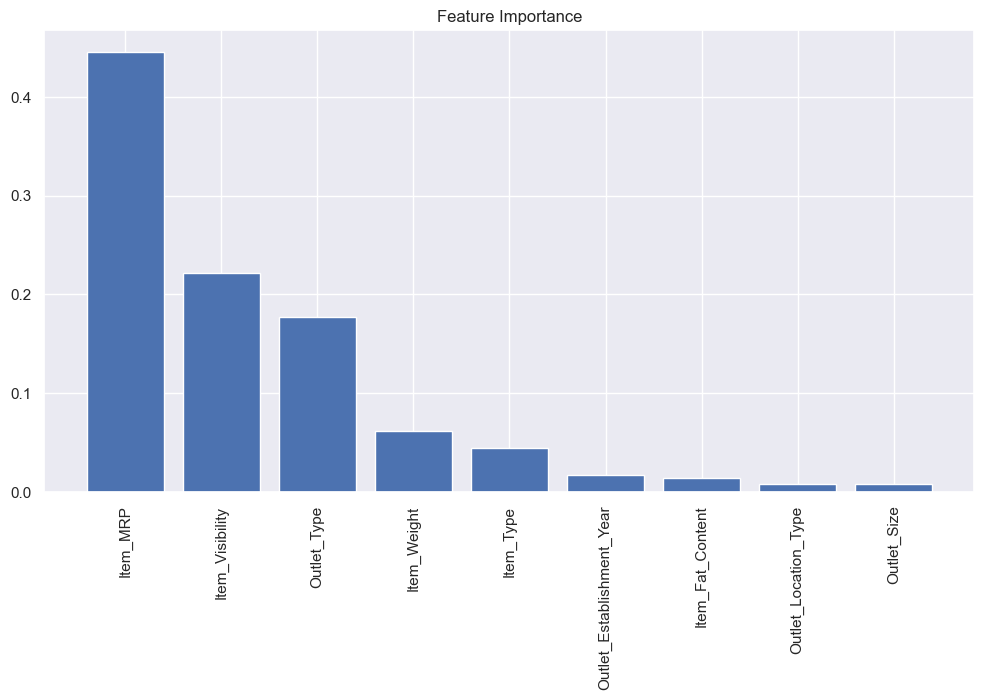

In [28]:
# Define and fit the RandomForestRegressor model with the best hyperparameters
best_rf = RandomForestRegressor(n_estimators=200, max_depth=20, min_samples_split=5, min_samples_leaf=2)
best_rf.fit(X_train, y_train)

# Get feature importances
importances = best_rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names based on feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(12, 6))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X.shape[1]), names, rotation=90)

# Show plot
plt.show()


# **Explaination**

## Project Analysis Report: Big Sales Data

## Project Overview:

- **Project Name:** Big Sales Data
- **Project Code:** # Data Science and Machine Learning Libraries

## Data Cleaning and Preprocessing:

- The shape of the dataframe is: 12 columns and 14,204 rows.
- After removing NULL values, the dataframe shape is (11815, 12).
- There are 0 NULL values in the dataframe.
- Data types: 4 float64, 1 int64, 7 object.

## Data Visualization:

- Visualized Categorical Data with count plots.
- Visualized Numerical Data with distribution plots.
- Explored correlation using a heatmap.
- Utilized pair plots for data visualization.

## Model Building and Evaluation:

- Trained models: Linear Regression and Random Forest Regressor.
- Model evaluation metrics:

 ### - **Linear Regression:**
 
    - R2 Score: 0.4407
    - MAE: 870.93
    - MSE: 1,683,033.49
    - RMSE: 1,297.32
    
 ### - **Random Forest Regressor:**
 
    - R2 Score: 0.4627
    - MAE: 826.16
    - MSE: 1,616,827.97
    - RMSE: 1,271.55

## Cross-Validation Scores:

- **Linear Regression:** [0.4503, 0.4353, 0.3830, 0.4442, 0.4422]

- **Random Forest Regressor:** [0.4916, 0.4517, 0.4817, 0.4708, 0.5077]

## Additional Metrics:

 ### - **Linear Regression:**
 
  - R2 Score: 0.4407
  - MAE: 870.93
  - MSE: 1,683,033.49
  - RMSE: 1,297.32
  
 ### - **Random Forest Regressor:**
 
  - R2 Score: 0.4627
  - MAE: 826.16
  - MSE: 1,616,827.97
  - RMSE: 1,271.55

## Feature Importance:

- The most important features in the Random Forest Regressor model were analyzed and visualized.

## Conclusion:

- The project "Big Sales Data" was analyzed using data science and machine learning techniques, showcasing detailed insights and model performance evaluation.

# Thank You